# Homework Assignment 4

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1

Load the `'parks.csv'` data set and obtain the `value_counts()` for each state. Use the Pandas `plot()` function to create a `'bar'` chart with the `value_counts()`. Which state has the highest number of National Parks?

<AxesSubplot:xlabel='location'>

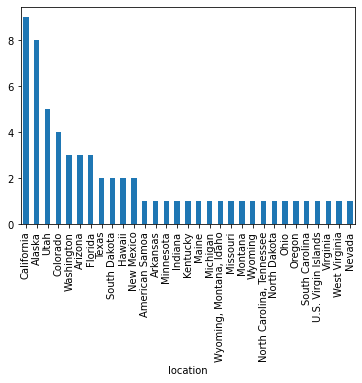

In [5]:
df = pd.read_csv('parks.csv')
df_state = df.value_counts('location')
df_state.plot.bar()

# California has the highest number of National Parks. 


### Question 2

Group the `parks` data by `location` to find the `mean` number of `visitors_2019` for each state, then `plot()` these results using a `'bar'` chart again. Does this graph look the same or different from the graph in Question 1? (**Note:** Remember to pass `sort_values(ascending=False)` after your `groupby` aggregation to plot the values in descending order from most-visited states to least-visited!)

<AxesSubplot:xlabel='location'>

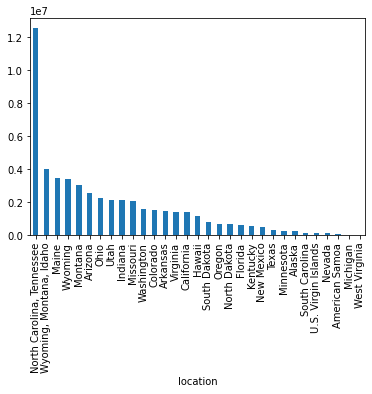

In [6]:
A = df['visitors_2019'].groupby(df['location']).mean().sort_values(ascending = False)
A.plot.bar()

#This graph looks different from the one before. The most visited parks are in North Carolina and Tennessee. 


### Question 3

Are older parks more popular than newer parks? To find out, first create a new variable for the `'year'` of establishment by passing the `'date_estb'` column in the function `pd.DatetimeIndex().year` (we will cover this in more depth in Class 5.) To account for multiple parks being opened in the same year, create a new DataFrame grouping the `parks.csv` data by `'year'` and summing the `'visitors_2019'` for each year and `reset_index()`. Then create a line plot with `'year'` on the x-axis and `'visitors_2019'` on the y-axis using this grouped DataFrame.

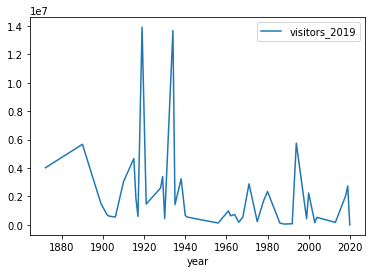

In [7]:
df['year'] = pd.DatetimeIndex(df['date_estb']).year
park_year = df['visitors_2019'].groupby(df['year']).sum().reset_index()
plot_park_year = park_year.plot.line(x ='year', y = 'visitors_2019')

#Yes, they are. Older parks that were established around 1910 and 1930 are more popular than newer parks.






### Question 4

Use Seaborn's `boxplot` function to compare the number of visitors to the national parks in California, Alaska, and Utah. Though these states have the largest numbers of national parks, do they see the same number of visitors? (**Note:** You will have to pass a subset of the DataFrame to the `data` argument to select only these three states. Recall that `.isin()` can take a list of strings when creating a Boolean mask for your data.)

<AxesSubplot:xlabel='location', ylabel='visitors_2019'>

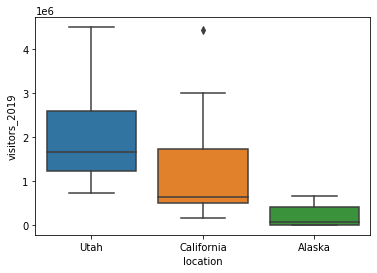

In [8]:
B = df[(df['location'] == 'California') | (df['location'] == 'Alaska') | (df['location'] == 'Utah')]
sns.boxplot(x = 'location', y = 'visitors_2019', data = B)
 #No, they do not see the same number of visitors. One clear indicator showing that the groups are different is their media. It does not overlap.

### Question 5

Do people flock to larger parks? Plot a scatterplot of `area_2019` by `visitors_2019` using Seaborn's `regplot` function.

<AxesSubplot:xlabel='area_2019', ylabel='visitors_2019'>

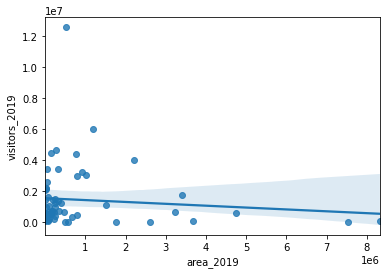

In [9]:
sns.regplot(x ='area_2019', y ='visitors_2019', data = df)
# There is a low negative correlation. Therefore, it shows that people do not flock to larger parks. 

### Question 6

Load the data `'nyc_buildings.csv'` and create a scatterplot of `height` and `floors`. Does the relationship between these two variables appear stronger or weaker than the relationship seen in Question 5?

<AxesSubplot:xlabel='height', ylabel='floors'>

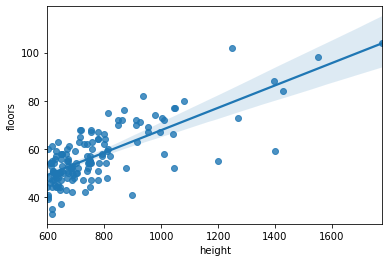

In [10]:
df2 = pd.read_csv('nyc_buildings.csv')
sns.regplot(x ='height', y ='floors', data = df2)

#The relationship between these two variables appear stronger than the relationship seen in Question 5. 

### Question 7

Group the `nyc_buildings` data by `year` and `sum` the total `height` for all buildings. Plot the resulting DataFrame as a line plot. Are the tallest buildings in New York relatively old or relatively young?

<AxesSubplot:xlabel='year'>

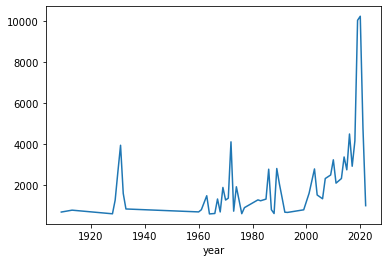

In [11]:
C = df2['height'].groupby(df2['year']).sum()
C.plot.line()
# The tallest buildings in New York are relatively young. 


### Question 8

Are there streets in New York where tall buildings are especially concentrated? Group the data by `street` and `sum` the `height` of the buildings. Reset the index and sort the values from tallest to smallest. Create a bar plot of the top 10 streets with the tallest total heights. Is anything surprising? (**Note:** To view the x-axis labels more clearly, first declare your subplots with `f, ax = plt.subplots()` before creating your barplot. In the barplot options, set `ax=ax`. Then you can use `ax.set_xticklabels` and pass the list of top ten street names as the labels while explicitly declaring the degrees of rotation you would like to see.)

[Text(0, 0, 'Park Avenue'),
 Text(1, 0, 'Broadway'),
 Text(2, 0, 'Sixth Avenue'),
 Text(3, 0, 'West 57th Street'),
 Text(4, 0, 'Fifth Avenue'),
 Text(5, 0, 'Lexington Avenue'),
 Text(6, 0, 'Greenwich Street'),
 Text(7, 0, 'Madison Avenue'),
 Text(8, 0, 'West 42nd Street'),
 Text(9, 0, 'West 34th Street')]

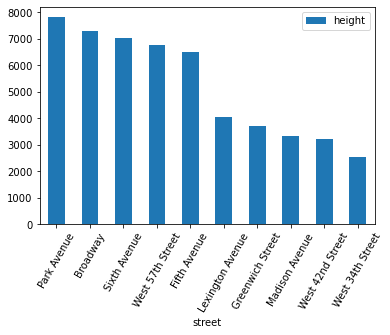

In [42]:
C = df2['height'].groupby(df2['street']).sum().sort_values(ascending=False).reset_index().head(10)
f, ax = plt.subplots()
C.plot.bar(x = 'street', y = 'height', ax=ax )
ax.set_xticklabels(C['street'], rotation = 60)

#Yes, there are 5 streets where the sum of the height of the buildings is concentrated. I found surprising that the heights are relatively consistent in the first group of 5 streets and in the second group. But there is a significant difference between those two groups.      

### Question 9

Look at the distribution of `floors` in the `nyc_buildings` data using Seaborn's `distplot` function. Use 30 bins. Then `print` the `mean` number of `floors` in the data set -- does this agree with what you would have expected from looking at the graph?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


57.15172413793103


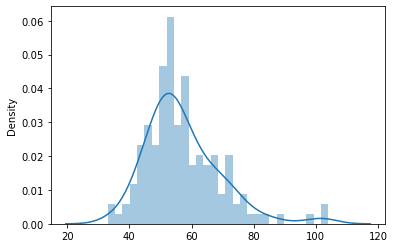

In [54]:
sns.distplot(x = df2['floors'], bins = 30)
mean = df2['floors'].mean()
print(mean)

#Yes, it does. 

### Question 10

Are there height differences between even-numbered floors and odd-numbered floors in New York? Recall that we can use `np.where()` to create a new variable, and that the modulus operator `%` will return the remainder. Create a binary variable called `'even'` where the field is `True` for an even number of floors and `False` for odd. Using Seaborn's `catplot` function, set `col='even'` and `kind='box'` to compare the two different `y='height'`. What do you observe?

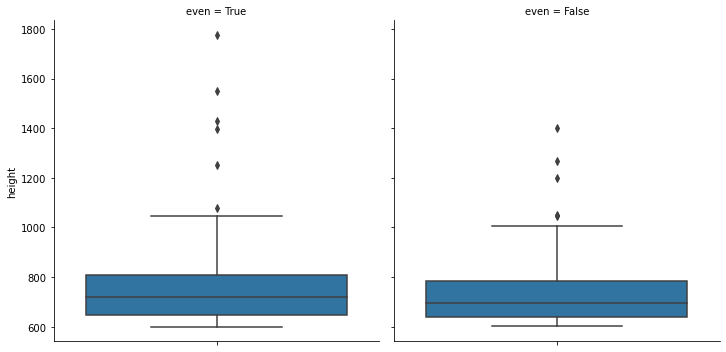

In [59]:
df2['even'] = np.where(df2['floors'] % 2 == 0, 'True', 'False')

sns.catplot(y = 'height', col ='even', kind = 'box', data = df2)
##Based on their medians, there is a slight height difference between the even-numbered floors and odd-numbered floors in New York. Moreover, the former one displays more variability due to its box size. Also, the even-numbered floors distribution has more outliers than the odd-numbered floors distribution.
